In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

In [2]:
from sklearn.preprocessing import LabelEncoder


def convert_category_into_integer(df: pd.DataFrame, columns: list):

    label_encoders = {}  # 각 열의 LabelEncoder 객체를 저장할 딕셔너리입니다.
    
    for column in columns:
        # 각 열에 대해 LabelEncoder 객체를 생성합니다.
        label_encoder = LabelEncoder()
        
        # LabelEncoder를 사용하여 해당 열의 범주형 데이터를 정수형으로 변환합니다.
        df.loc[:, column] = label_encoder.fit_transform(df[column])
        
        # 변환된 LabelEncoder 객체를 딕셔너리에 저장합니다.
        label_encoders.update({column: label_encoder})
    
    # 변환된 데이터프레임과 LabelEncoder 객체를 포함하는 딕셔너리를 반환합니다.
    return df, label_encoders

In [4]:
data = pd.read_csv(r'/Users/bh/project2/project2_Team1/project2/data/train.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [7]:
data = data.dropna()

In [15]:
data, _ = convert_category_into_integer(data, ('Churn','ServiceArea','ChildrenInHH','HandsetRefurbished','HandsetWebCapable','TruckOwner','RVOwner','Homeownership','BuysViaMailOrder','RespondsToMailOffers','OptOutMailings','NonUSTravel','OwnsComputer','HasCreditCard','NewCellphoneUser','NotNewCellphoneUser','OwnsMotorcycle','HandsetPrice','MadeCallToRetentionTeam','CreditRating','PrizmCode','Occupation','MaritalStatus'))

In [16]:
data[['Churn','ServiceArea','ChildrenInHH','HandsetRefurbished','HandsetWebCapable','TruckOwner','RVOwner','Homeownership','BuysViaMailOrder','RespondsToMailOffers','OptOutMailings','NonUSTravel','OwnsComputer','HasCreditCard','NewCellphoneUser','NotNewCellphoneUser','OwnsMotorcycle','HandsetPrice','MadeCallToRetentionTeam','CreditRating','PrizmCode','Occupation','MaritalStatus']]=data[['Churn','ServiceArea','ChildrenInHH','HandsetRefurbished','HandsetWebCapable','TruckOwner','RVOwner','Homeownership','BuysViaMailOrder','RespondsToMailOffers','OptOutMailings','NonUSTravel','OwnsComputer','HasCreditCard','NewCellphoneUser','NotNewCellphoneUser','OwnsMotorcycle','HandsetPrice','MadeCallToRetentionTeam','CreditRating','PrizmCode','Occupation','MaritalStatus']].astype(int)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49752 entries, 0 to 51043
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 49752 non-null  int64  
 1   Churn                      49752 non-null  int64  
 2   MonthlyRevenue             49752 non-null  float64
 3   MonthlyMinutes             49752 non-null  float64
 4   TotalRecurringCharge       49752 non-null  float64
 5   DirectorAssistedCalls      49752 non-null  float64
 6   OverageMinutes             49752 non-null  float64
 7   RoamingCalls               49752 non-null  float64
 8   PercChangeMinutes          49752 non-null  float64
 9   PercChangeRevenues         49752 non-null  float64
 10  DroppedCalls               49752 non-null  float64
 11  BlockedCalls               49752 non-null  float64
 12  UnansweredCalls            49752 non-null  float64
 13  CustomerCareCalls          49752 non-null  float64


In [18]:
Churn1 =  data[data['Churn']==1]
Churn0 =  data[data['Churn']==0]

<Axes: xlabel='MonthlyRevenue', ylabel='count'>

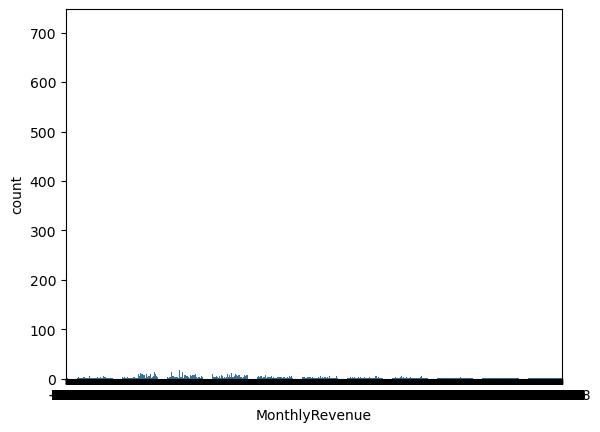

In [34]:
sns.countplot(x="MonthlyRevenue", data=Churn0)

<Axes: xlabel='MonthlyRevenue', ylabel='count'>

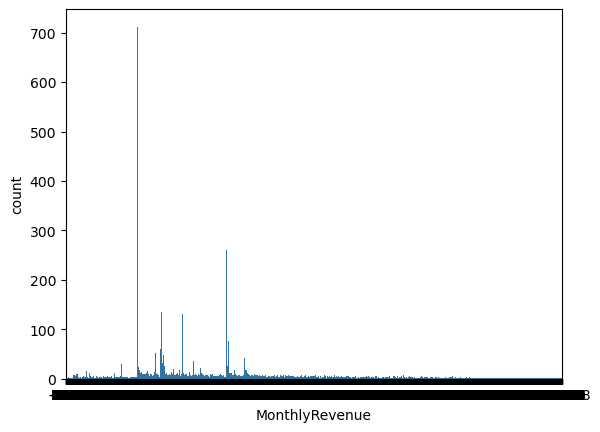

In [33]:
sns.countplot(x="MonthlyRevenue", data=Churn0, width=5)

<Axes: xlabel='MonthlyRevenue', ylabel='count'>

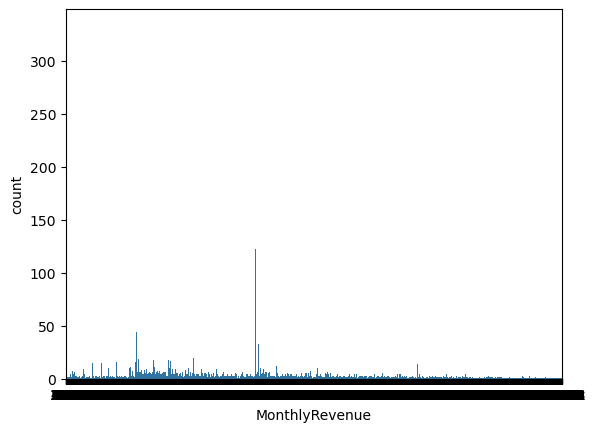

In [32]:
sns.countplot(x="MonthlyRevenue", data=Churn1,width=5)

<Axes: xlabel='MonthlyRevenue', ylabel='Density'>

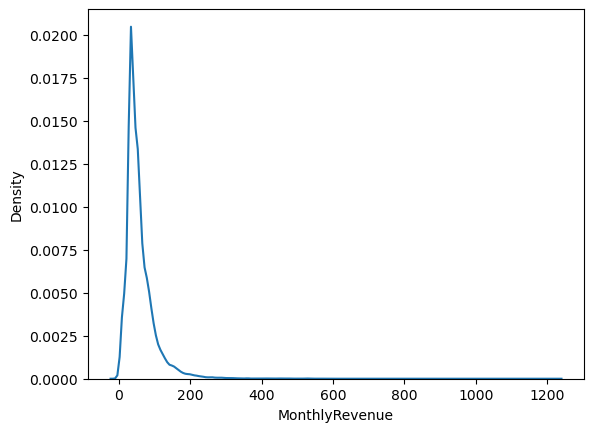

In [27]:
sns.kdeplot(Churn0['MonthlyRevenue'])

(array([3.2897e+04, 2.3290e+03, 2.0300e+02, 4.9000e+01, 2.2000e+01,
        3.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  -6.17 ,  116.785,  239.74 ,  362.695,  485.65 ,  608.605,
         731.56 ,  854.515,  977.47 , 1100.425, 1223.38 ]),
 <BarContainer object of 10 artists>)

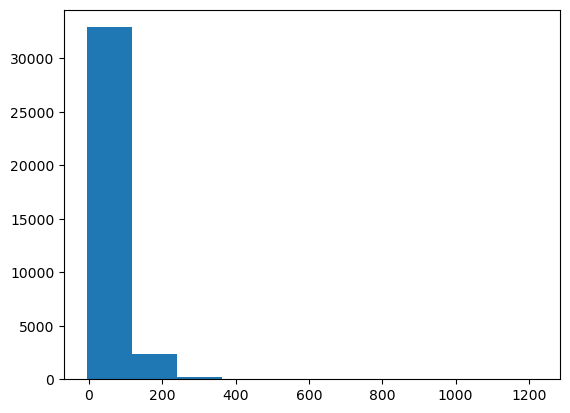

In [29]:
plt.hist(Churn0['MonthlyRevenue'])

(array([1.2177e+04, 1.7470e+03, 2.3900e+02, 5.9000e+01, 1.3000e+01,
        1.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([  2.54 ,  88.397, 174.254, 260.111, 345.968, 431.825, 517.682,
        603.539, 689.396, 775.253, 861.11 ]),
 <BarContainer object of 10 artists>)

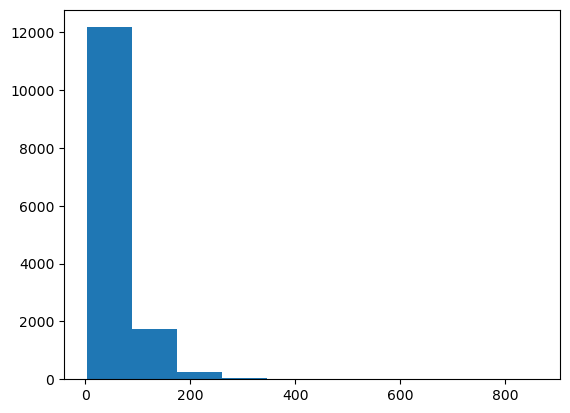

In [30]:
plt.hist(Churn1['MonthlyRevenue'])

<Axes: xlabel='MonthlyMinutes', ylabel='count'>

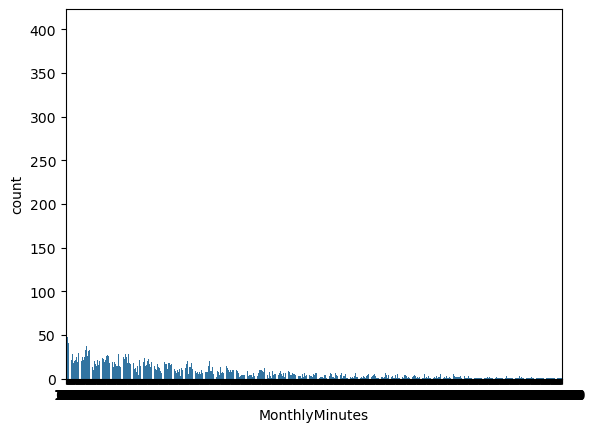

In [35]:
sns.countplot(x="MonthlyMinutes", data=Churn1)

<Axes: xlabel='MonthlyMinutes', ylabel='count'>

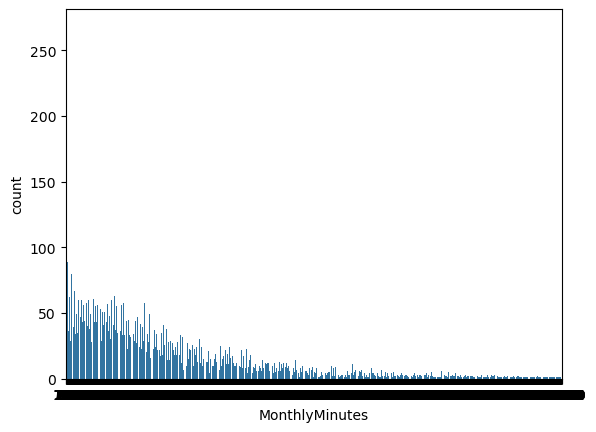

In [36]:
sns.countplot(x="MonthlyMinutes", data=Churn0)

<Axes: xlabel='TotalRecurringCharge', ylabel='count'>

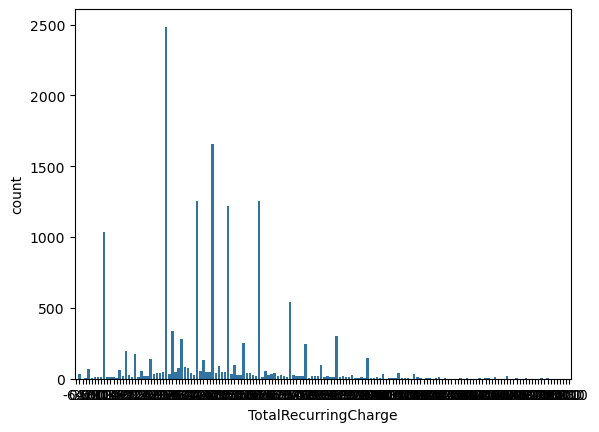

In [37]:
sns.countplot(x="TotalRecurringCharge", data=Churn1)

<Axes: xlabel='TotalRecurringCharge', ylabel='count'>

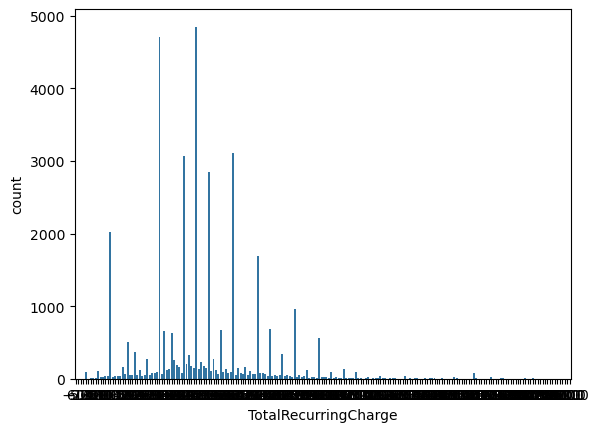

In [38]:
sns.countplot(x="TotalRecurringCharge", data=Churn0)

<Axes: xlabel='TotalRecurringCharge', ylabel='Count'>

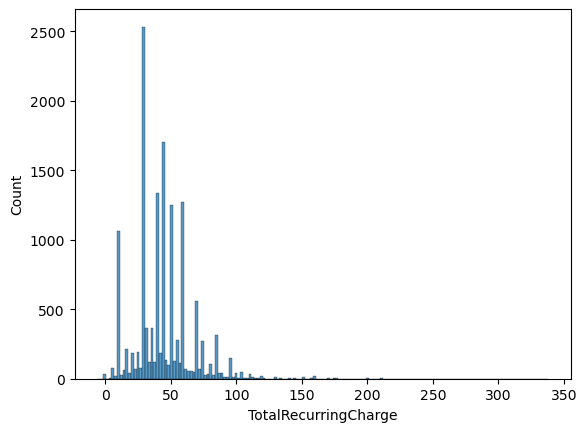

In [40]:
sns.histplot(x="TotalRecurringCharge", data=Churn1)

<Axes: xlabel='TotalRecurringCharge', ylabel='Count'>

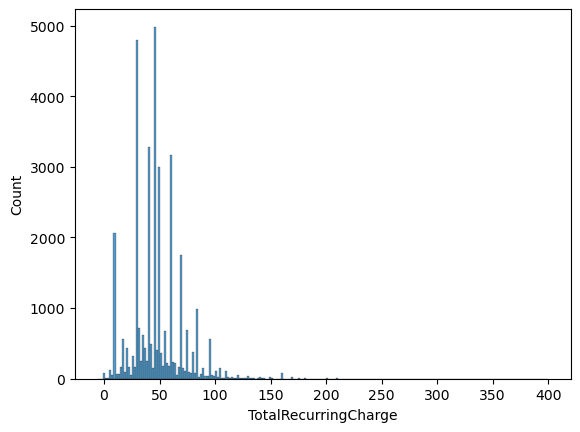

In [39]:
sns.histplot(x="TotalRecurringCharge", data=Churn0)

<Axes: xlabel='TotalRecurringCharge', ylabel='Density'>

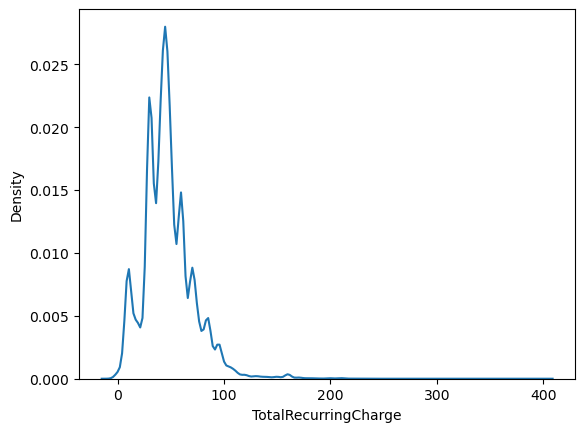

In [41]:
sns.kdeplot(x="TotalRecurringCharge", data=Churn0)

<Axes: xlabel='TotalRecurringCharge', ylabel='Density'>

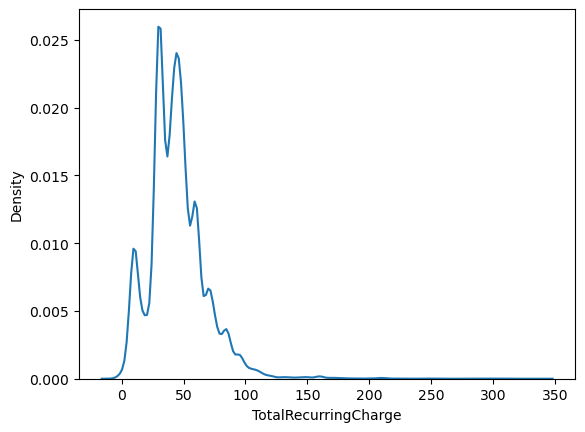

In [42]:
sns.kdeplot(x="TotalRecurringCharge", data=Churn1)

<Axes: xlabel='MonthsInService', ylabel='Density'>

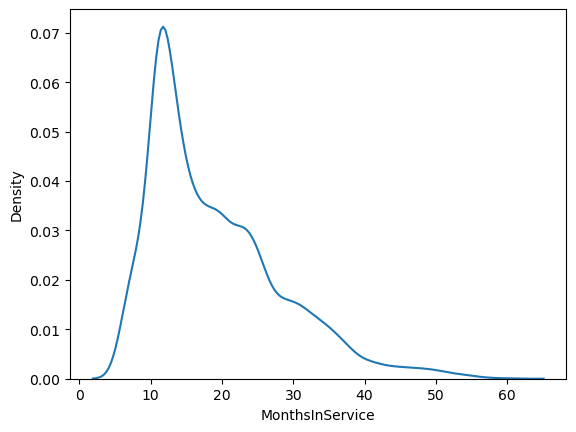

In [90]:
sns.kdeplot(x="MonthsInService", data=Churn1)

<Axes: xlabel='MonthsInService', ylabel='Density'>

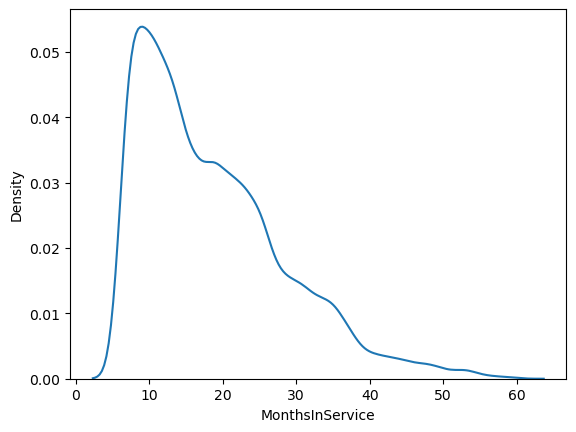

In [91]:
sns.kdeplot(x="MonthsInService", data=Churn0)

<Axes: xlabel='MonthsInService', ylabel='Count'>

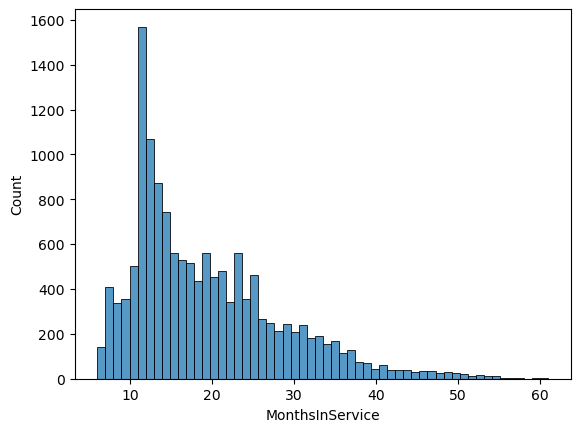

In [94]:
sns.histplot(x="MonthsInService", data=Churn1)

<Axes: xlabel='MonthsInService', ylabel='Count'>

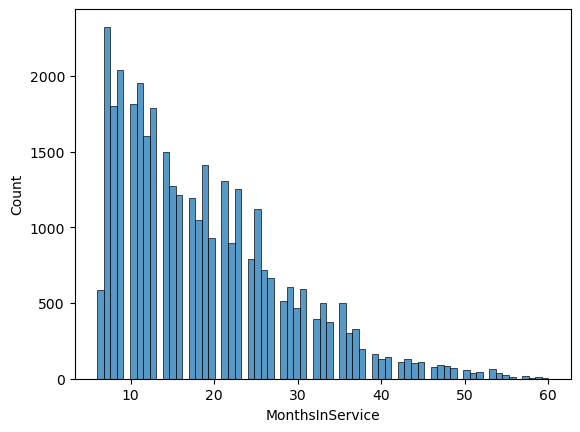

In [95]:
sns.histplot(x="MonthsInService", data=Churn0)

<Axes: xlabel='CurrentEquipmentDays', ylabel='Density'>

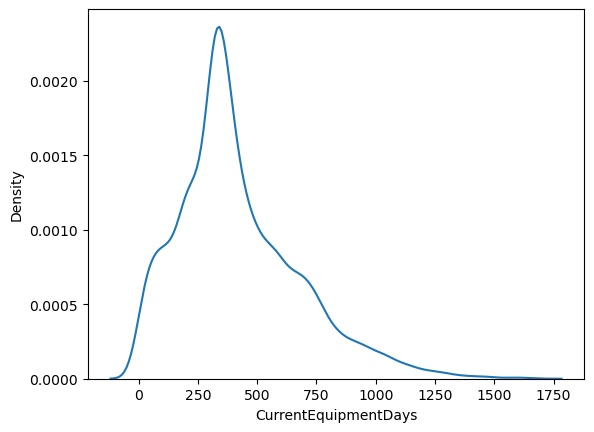

In [113]:
sns.kdeplot(x="CurrentEquipmentDays", data=Churn1)

<Axes: xlabel='CurrentEquipmentDays', ylabel='Density'>

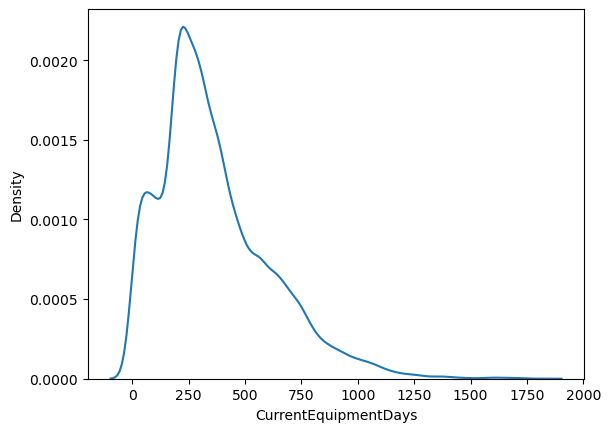

In [114]:
sns.kdeplot(x="CurrentEquipmentDays", data=Churn0)

<Axes: xlabel='CurrentEquipmentDays', ylabel='Count'>

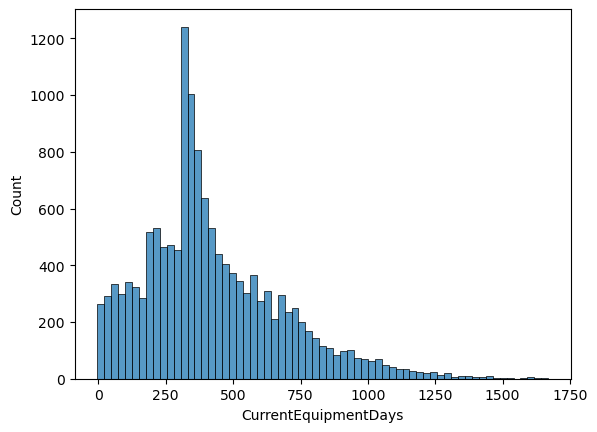

In [115]:
sns.histplot(x="CurrentEquipmentDays", data=Churn1)

<Axes: xlabel='CurrentEquipmentDays', ylabel='Count'>

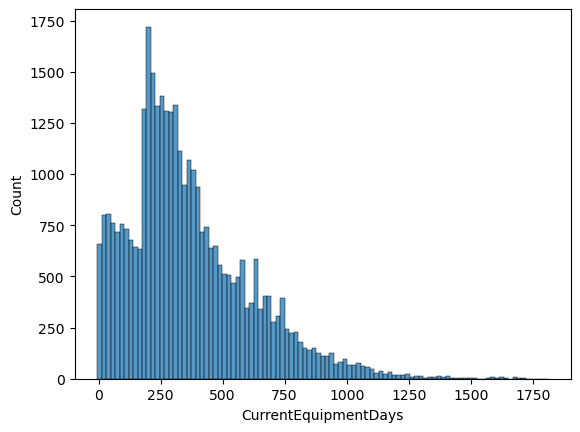

In [116]:
sns.histplot(x="CurrentEquipmentDays", data=Churn0)

In [163]:
temp = Churn0[Churn0['AdjustmentsToCreditRating']<10]

<Axes: xlabel='MaritalStatus', ylabel='Density'>

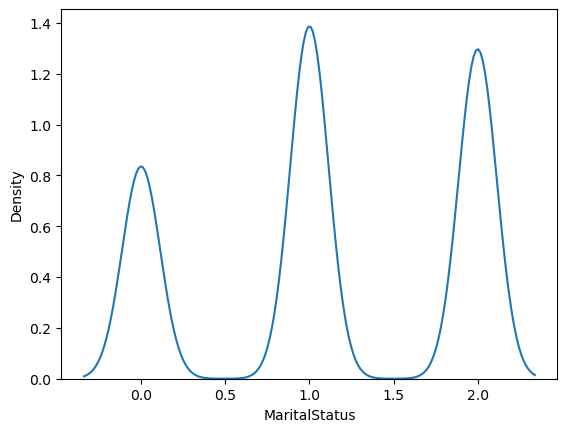

In [177]:
sns.kdeplot(x="MaritalStatus", data=Churn1)

<Axes: xlabel='MaritalStatus', ylabel='Density'>

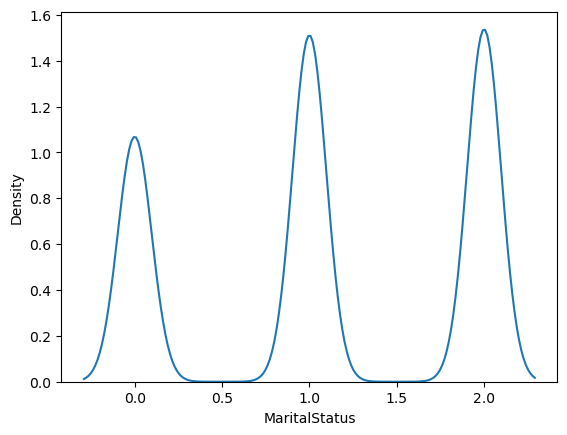

In [178]:
sns.kdeplot(x="MaritalStatus", data=Churn0)

<Axes: xlabel='MaritalStatus', ylabel='Count'>

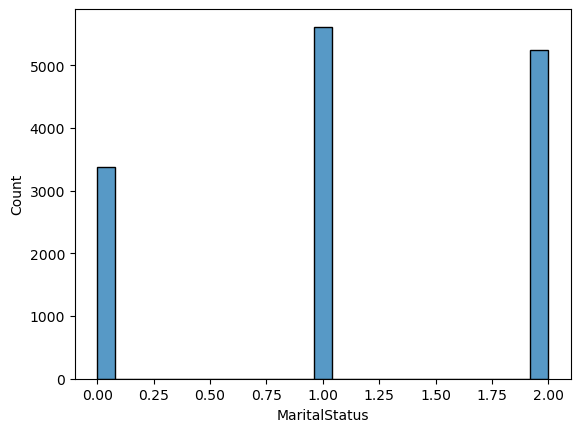

In [179]:
sns.histplot(x="MaritalStatus", data=Churn1)

<Axes: xlabel='MaritalStatus', ylabel='Count'>

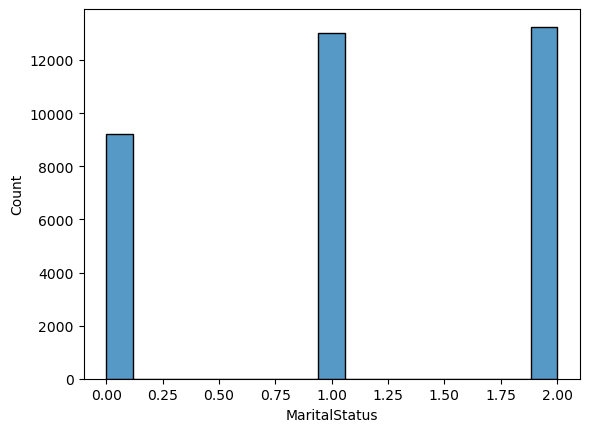

In [180]:
sns.histplot(x="MaritalStatus", data=Churn0)

In [22]:
data = pd.read_csv('./data/train.csv', usecols=['Churn','TotalRecurringCharge', 'MonthsInService', 'CurrentEquipmentDays','CreditRating','RetentionCalls','RespondsToMailOffers','BuysViaMailOrder','HandsetWebCapable'])
data = data.dropna()
data.CreditRating = data.CreditRating.str[0].astype(int) # 신용등급 숫자로 변경
# 1. 고객 충성도 레이블 (Customer Loyalty)
# 'MonthsInService'와 'RetentionCalls'을 기반으로 고객이 얼마나 오랜 기간 동안 서비스에 머물렀는지, 그리고 고객 유지 노력의 결과를 반영
data['CustomerLoyalty'] = np.where(
    (data['MonthsInService'] > data['MonthsInService'].mean()) &
    (data['RetentionCalls'] > 0), 
    'High Loyalty', 'Low Loyalty'
)

# 2. 서비스 사용 기간 레이블 (Equipment Usage Duration)
# 'CurrentEquipmentDays'를 사용해 서비스를 얼마나 사용하고 있는지 반영
data['EquipmentUsageDuration'] = np.where(
    data['CurrentEquipmentDays'] > data['CurrentEquipmentDays'].mean(), 
    'Long-Term Equipment User', 'Short-Term Equipment User'
)

# 3. 요금 부담 레이블 (Charge Burden)
# 'TotalRecurringCharge'를 기준으로 요금 부담이 높은지 낮은지를 분류
data['ChargeBurden'] = np.where(
    data['TotalRecurringCharge'] > data['TotalRecurringCharge'].mean(), 
    'High Charge', 'Low Charge'
)

# 4. 신용 등급 레이블 (Credit Rating Category)
# 'CreditRating'을 기준으로 신용 등급을 두 그룹으로 나눔
data['CreditCategory'] = np.where(
    data['CreditRating'] > data['CreditRating'].median(), 
    'High Credit', 'Low Credit'
)

# 5. 구매 및 메일 응답 행동 (Purchase and Mail Response Behavior)
# 'BuysViaMailOrder'와 'RespondsToMailOffers'를 결합하여 고객의 마케팅 참여도 파악
data['MarketingEngagement'] = np.where(
    (data['BuysViaMailOrder'] == 'Yes') & (data['RespondsToMailOffers'] == 'Yes'), 
    'Fully Engaged',
    np.where(
        (data['BuysViaMailOrder'] == 'Yes') | (data['RespondsToMailOffers'] == 'Yes'), 
        'Partially Engaged', 'Not Engaged'
    )
)

# 6. 핸드셋 웹 사용 가능 여부 (Handset Web Capability)
# 'HandsetWebCapable'을 사용하여 핸드셋이 웹 사용 가능한지 여부를 분류
data['HandsetWebCapability'] = np.where(
    data['HandsetWebCapable'] == 'Yes', 
    'WebCapable', 'NonWebCapable'
)
label_encoder = LabelEncoder()

# 레이블 인코딩을 적용할 열 목록
columns_to_encode = [
'HandsetWebCapable',
'BuysViaMailOrder',
'RespondsToMailOffers',
'CustomerLoyalty',
'EquipmentUsageDuration',
'ChargeBurden',
'CreditCategory',
'MarketingEngagement',
'HandsetWebCapability'
]

# 각 열에 대해 레이블 인코딩 수행
for col in columns_to_encode:
    data[col] = label_encoder.fit_transform(data[col])

In [23]:
data.columns

Index(['Churn', 'TotalRecurringCharge', 'MonthsInService',
       'CurrentEquipmentDays', 'HandsetWebCapable', 'BuysViaMailOrder',
       'RespondsToMailOffers', 'RetentionCalls', 'CreditRating',
       'CustomerLoyalty', 'EquipmentUsageDuration', 'ChargeBurden',
       'CreditCategory', 'MarketingEngagement', 'HandsetWebCapability'],
      dtype='object')

In [16]:
data = data.drop(columns=['TotalRecurringCharge','MonthsInService','CurrentEquipmentDays','EquipmentUsageDuration'])

In [24]:
train, valid = train_test_split(data, random_state=0, test_size=0.3)

In [25]:
lgbm = LGBMClassifier(random_state=0)

lgbm.fit(train.drop(columns= 'Churn'),train['Churn'])

print(
classification_report(
    valid.Churn,
    lgbm.predict(valid.drop(columns='Churn'))
)
)

[LightGBM] [Info] Number of positive: 10252, number of negative: 25371
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 504
[LightGBM] [Info] Number of data points in the train set: 35623, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.287792 -> initscore=-0.906134
[LightGBM] [Info] Start training from score -0.906134
              precision    recall  f1-score   support

          No       0.72      0.98      0.83     10878
         Yes       0.50      0.05      0.10      4389

    accuracy                           0.71     15267
   macro avg       0.61      0.52      0.46     15267
weighted avg       0.66      0.71      0.62     15267



<Axes: xlabel='TotalRecurringCharge', ylabel='Density'>

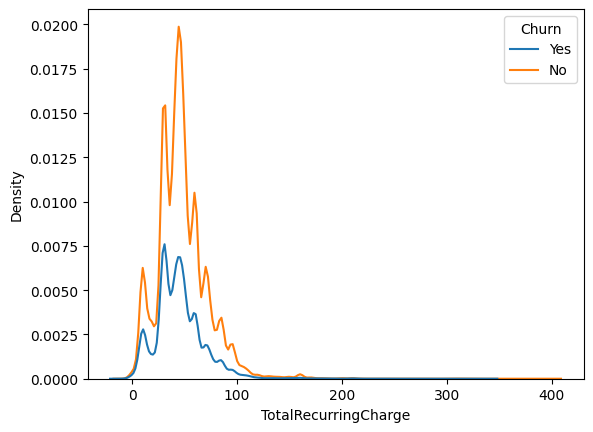

In [15]:
sns.kdeplot(x="TotalRecurringCharge", data=data,hue='Churn')